# DSD-2021 Project (CIFAR-10)
---
## All layer inference check
- This is a python script to help you check if your RTL impelementation for all the layers are correct

## Usage
- Run all the cells to check if your HW works


In [1]:
from utils.layers_cifar10 import *
from utils.bit_operation import *
from utils.setup_cifar10 import *
from utils.scale_uart import *
from utils.board import *
import time
import numpy as np
import time

### Load dataset for image generate

In [2]:
label_list = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", \
              "Horse", "Ship", "Truck"]
# TEST ORIGIN
X_test_origin, _ = load_CIFAR10_test()
# TEST SET
X_test, y_test = load_CIFAR10_test()

# Data Pre-processing
m = [0.4935, 0.4834, 0.4472]
std = [0.2476, 0.2626, 0.2626]
# Only pre-process the test dataset
X_test = np.reshape(X_test, (X_test.shape[0], 3, 32, 32))
for i in range(3):
    X_test[:,i,:,:] = (X_test[:,i,:,:]-m[i])/std[i]

### Simulation dataset for our 8-bit MAC unit

In [3]:
X_test_ = np.load("./data/cifar10_dataset_quan/images_100.npy")

## Load network parameter
---

In [4]:
# Load quantized network param
conv1_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv1_weight_quan.npy")
conv1_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv1_bias_quan.npy")
conv2_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv2_weight_quan.npy")
conv2_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv2_bias_quan.npy")
conv3_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv3_weight_quan.npy")
conv3_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv3_bias_quan.npy")
conv4_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv4_weight_quan.npy")
conv4_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv4_bias_quan.npy")
conv5_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv5_weight_quan.npy")
conv5_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv5_bias_quan.npy")
conv6_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv6_weight_quan.npy")
conv6_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv6_bias_quan.npy")
fc1_w_   = np.load("./data/cifar10_network_quan_param/cifar10_fc1_weight_quan.npy")
fc1_b_   = np.load("./data/cifar10_network_quan_param/cifar10_fc1_bias_quan.npy")
fc2_w_   = np.load("./data/cifar10_network_quan_param/cifar10_fc2_weight_quan.npy")
fc2_b_   = np.load("./data/cifar10_network_quan_param/cifar10_fc2_bias_quan.npy")
fc3_w_   = np.load("./data/cifar10_network_quan_param/cifar10_fc3_weight_quan.npy")
fc3_b_   = np.load("./data/cifar10_network_quan_param/cifar10_fc3_bias_quan.npy")

## Test for accuracy  
---
Do inference

### Board connection

In [5]:
port_list = get_port_list()
SU = get_scale_uart(port_list)

Current OS: Windows
['COM1', 'COM4']
COM1 port cannot be connected.
COM4 port connected!


### Setting the VDMA

In [6]:
## DO NOT CHANGE 
## IT IS VDMA AND EACH MODULE'S BASE ADDRESS FOR CONTROL APB + AXI
##### PARAMETER INFORMATION
VDMA0_BASE_ADDR= 0x0c00_0000
VDMA1_BASE_ADDR= 0x0c10_0000
VDMA2_BASE_ADDR= 0x0c20_0000

FC_BASE_ADDR   = 0x0d00_0000
CONV_BASE_ADDR = 0x0d10_0000
POOL_BASE_ADDR = 0x0d20_0000

### FIXED FOR OUR NETWORK
OP_SIZE                        = 4
ADDR_SIZE                      = 28
DATA_SIZE                      = 32

Image address memory map  
---
Addresss range: 0x0000_0000 ~ 0x01FF_FFFF    
Size: 32768 KB

In [7]:
start = time.time()
SU.su_write_data(0x0000_0000, 3)
data = SU.su_read_data(0x0000_0000)
SU.su_set_image({'BASE_ADDR': 0x0000_0000}, "./data/cifar10_dataset_quan/images_100.npy")
print("image set done")
print("\tTotal time: {:.2f} sec".format(time.time() - start))

image set done
	Total time: 33.48 sec


Conv1 memory map
---
Convolution 1  
Weight   
&nbsp;&nbsp;&nbsp;Address range: 0x0200_0000 ~ 0x020F_FFFF   
&nbsp;&nbsp;&nbsp;Size: 1024KB   
bias   
&nbsp;&nbsp;&nbsp;Address range: 0x0210_0000 ~ 0x021F_FFFF   
&nbsp;&nbsp;&nbsp;Size: 1024KB   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x0600_0000 ~ 0x060F_FFFF       
&nbsp;&nbsp;&nbsp;Size: 1024KB   

In [ ]:
print("conv1 parameter load")
start = time.time()
SU.su_set_conv_w({'BASE_ADDR': 0x0200_0000}, "./data/cifar10_network_quan_param/cifar10_conv1_weight_quan.npy")
SU.su_set_conv_b({'BASE_ADDR': 0x0210_0000}, "./data/cifar10_network_quan_param/cifar10_conv1_bias_quan.npy")
print("conv1 set done")
print("\tTotal time: {:.2f} sec".format(time.time() - start))

Pool1 memory map
---
Max Pool 1  
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x0610_0000 ~ 0x061F_FFFF      
&nbsp;&nbsp;&nbsp;Size: 1024KB   

Conv2 memory map
---
Convolution 2  
Weight   
&nbsp;&nbsp;&nbsp;Address range: 0x0220_0000 ~ 0x026F_FFFF  
&nbsp;&nbsp;&nbsp;Size: 5120KB   
bias   
&nbsp;&nbsp;&nbsp;Address range: 0x0270_0000 ~ 0x027F_FFFF   
&nbsp;&nbsp;&nbsp;Size: 1024KB   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x0620_0000 ~ 0x062F_FFFF       
&nbsp;&nbsp;&nbsp;Size: 1024KB   

In [ ]:
print("conv2 parameter load")
start = time.time()
SU.su_set_conv_w({'BASE_ADDR': 0x0220_0000}, "./data/cifar10_network_quan_param/cifar10_conv2_weight_quan.npy")
SU.su_set_conv_b({'BASE_ADDR': 0x0270_0000}, "./data/cifar10_network_quan_param/cifar10_conv2_bias_quan.npy")
print("conv2 set done")
print("\tTotal time: {:.2f} sec".format(time.time() - start))

Pool2 memory map
---
Max Pool 2   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x0630_0000 ~ 0x063F_FFFF      
&nbsp;&nbsp;&nbsp;Size: 1024KB 

Conv3 memory map
---
Convolution 3  
Weight   
&nbsp;&nbsp;&nbsp;Address range: 0x0280_0000 ~ 0x028F_FFFF  
&nbsp;&nbsp;&nbsp;Size: 5120KB   
bias   
&nbsp;&nbsp;&nbsp;Address range: 0x02C0_0000 ~ 0x02CF_FFFF   
&nbsp;&nbsp;&nbsp;Size: 1024KB   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x0640_0000 ~ 0x064F_FFFF       
&nbsp;&nbsp;&nbsp;Size: 1024KB   

In [ ]:
print("conv3 parameter load")
start = time.time()
SU.su_set_conv_w({'BASE_ADDR': 0x0280_0000}, "./data/cifar10_network_quan_param/cifar10_conv3_weight_quan.npy")
SU.su_set_conv_b({'BASE_ADDR': 0x02C0_0000}, "./data/cifar10_network_quan_param/cifar10_conv3_bias_quan.npy")
print("conv3 set done")
print("\tTotal time: {:.2f} sec".format(time.time() - start))

Conv4 memory map
---
Convolution 4  
Weight   
&nbsp;&nbsp;&nbsp;Address range: 0x0300_0000 ~ 0x038F_FFFF  
&nbsp;&nbsp;&nbsp;Size: 9216KB   
bias   
&nbsp;&nbsp;&nbsp;Address range: 0x0390_0000 ~ 0x039F_FFFF   
&nbsp;&nbsp;&nbsp;Size: 1024KB   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x0650_0000 ~ 0x065F_FFFF       
&nbsp;&nbsp;&nbsp;Size: 1024KB   

In [ ]:
print("conv4 parameter load")
start = time.time()
SU.su_set_conv_w({'BASE_ADDR': 0x0300_0000}, "./data/cifar10_network_quan_param/cifar10_conv4_weight_quan.npy")
SU.su_set_conv_b({'BASE_ADDR': 0x0390_0000}, "./data/cifar10_network_quan_param/cifar10_conv4_bias_quan.npy")
print("conv4 set done")
print("\tTotal time: {:.2f} sec".format(time.time() - start))

Pool3 memory map
---
Max Pool 3   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x0660_0000 ~ 0x066F_FFFF      
&nbsp;&nbsp;&nbsp;Size: 1024KB   

Conv5 memory map
---
Convolution 5  
Weight   
&nbsp;&nbsp;&nbsp;Address range: 0x03A0_0000 ~ 0x03EF_FFFF  
&nbsp;&nbsp;&nbsp;Size: 5120KB   
bias   
&nbsp;&nbsp;&nbsp;Address range: 0x03F0_0000 ~ 0x03FF_FFFF   
&nbsp;&nbsp;&nbsp;Size: 1024KB   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x0670_0000 ~ 0x067F_FFFF       
&nbsp;&nbsp;&nbsp;Size: 1024KB   

In [ ]:
print("conv5 parameter load")
start = time.time()
SU.su_set_conv_w({'BASE_ADDR': 0x03A0_0000}, "./data/cifar10_network_quan_param/cifar10_conv5_weight_quan.npy")
SU.su_set_conv_b({'BASE_ADDR': 0x03F0_0000}, "./data/cifar10_network_quan_param/cifar10_conv5_bias_quan.npy")
print("conv5 set done")
print("\tTotal time: {:.2f} sec".format(time.time() - start))

Conv6 memory map
---
Convolution 6  
Weight   
&nbsp;&nbsp;&nbsp;Address range: 0x0400_0000 ~ 0x048F_FFFF  
&nbsp;&nbsp;&nbsp;Size: 9216KB   
bias   
&nbsp;&nbsp;&nbsp;Address range: 0x0490_0000 ~ 0x049F_FFFF   
&nbsp;&nbsp;&nbsp;Size: 1024KB   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x0680_0000 ~ 0x068F_FFFF       
&nbsp;&nbsp;&nbsp;Size: 1024KB   

In [ ]:
print("conv6 parameter load")
start = time.time()
SU.su_set_conv_w({'BASE_ADDR': 0x0400_0000}, "./data/cifar10_network_quan_param/cifar10_conv6_weight_quan.npy")
SU.su_set_conv_b({'BASE_ADDR': 0x0490_0000}, "./data/cifar10_network_quan_param/cifar10_conv6_bias_quan.npy")
print("conv6 set done")
print("\tTotal time: {:.2f} sec".format(time.time() - start))

Pool4 memory map
---
Max Pool 4   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x0690_0000 ~ 0x069F_FFFF      
&nbsp;&nbsp;&nbsp;Size: 1024KB   

FC1 memory map
---
Fully-Connected 1    
Weight   
&nbsp;&nbsp;&nbsp;Address range: 0x0500_0000 ~ 0x052F_FFFF  
&nbsp;&nbsp;&nbsp;Size: 3072KB   
bias   
&nbsp;&nbsp;&nbsp;Address range: 0x0530_0000 ~ 0x053F_FFFF     
&nbsp;&nbsp;&nbsp;Size: 1024KB   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x06A0_0000 ~ 0x06AF_FFFF       
&nbsp;&nbsp;&nbsp;Size: 1024KB 

In [ ]:
print("fc1 parameter load")
start = time.time()
SU.su_set_fc_w({'BASE_ADDR': 0x0500_0000}, "./data/cifar10_network_quan_param/cifar10_fc1_weight_quan.npy")
SU.su_set_fc_b({'BASE_ADDR': 0x0530_0000}, "./data/cifar10_network_quan_param/cifar10_fc1_bias_quan.npy")
print("fc1 set done")
print("\tTotal time: {:.2f} sec".format(time.time() - start))

FC2 memory map
---
Fully-Connected 2    
Weight   
&nbsp;&nbsp;&nbsp;Address range: 0x0540_0000 ~ 0x054F_FFFF  
&nbsp;&nbsp;&nbsp;Size: 1024KB   
bias   
&nbsp;&nbsp;&nbsp;Address range: 0x0550_0000 ~ 0x055F_FFFF     
&nbsp;&nbsp;&nbsp;Size: 1024KB   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x06B0_0000 ~ 0x06BF_FFFF       
&nbsp;&nbsp;&nbsp;Size: 1024KB 

In [ ]:
print("fc2 parameter load")
start = time.time()
SU.su_set_fc_w({'BASE_ADDR': 0x0540_0000}, "./data/cifar10_network_quan_param/cifar10_fc2_weight_quan.npy")
SU.su_set_fc_b({'BASE_ADDR': 0x0550_0000}, "./data/cifar10_network_quan_param/cifar10_fc2_bias_quan.npy")
print("fc2 set done")
print("\tTotal time: {:.2f} sec".format(time.time() - start))

FC3 memory map
---
Fully-Connected 3    
Weight   
&nbsp;&nbsp;&nbsp;Address range: 0x0560_0000 ~ 0x056F_FFFF  
&nbsp;&nbsp;&nbsp;Size: 1024KB   
bias   
&nbsp;&nbsp;&nbsp;Address range: 0x0570_0000 ~ 0x057F_FFFF     
&nbsp;&nbsp;&nbsp;Size: 1024KB   
output   
&nbsp;&nbsp;&nbsp;Addresss range: 0x06C0_0000 ~ 0x06CF_FFFF       
&nbsp;&nbsp;&nbsp;Size: 1024KB 

In [ ]:
print("fc3 parameter load")
start = time.time()
SU.su_set_fc_w({'BASE_ADDR': 0x0560_0000}, "./data/cifar10_network_quan_param/cifar10_fc3_weight_quan.npy")
SU.su_set_fc_b({'BASE_ADDR': 0x0570_0000}, "./data/cifar10_network_quan_param/cifar10_fc3_bias_quan.npy")
print("fc3 set done")
print("\tTotal time: {:.2f} sec".format(time.time() - start))

### Parameter check (For debugging!)

In the below code, it verifies that **the data is stored correctly in DRAM**

In [ ]:
debug_data = np.load("./data/cifar10_dataset_quan/images_100.npy")

In [ ]:
print(debug_data.shape)

### First, just check first image (debug_data[0])

In [ ]:
# Print in 4 Bytes
debug_flat = debug_data.flatten()
for i in range(int(1 * 3 * 32 * 32 / 4)):
    temp = debug_flat[i*4:i*4+4]
    print(i, "\t", temp)

In [ ]:
debug_flat_bin = to_8bit_fixed_binary(debug_flat)
for i in range(int(1 * 3 * 32 * 32 / 4)):
    temp = debug_flat_bin[i*4:i*4+4]
    print(i, "\t", temp)

In [ ]:
# Check for written data in DRAM
base_addr_debug = 0x0000_0000 # input image
for i in range(int(1 * 3 * 32 * 32 / 4)):
    data = SU.su_read_data(base_addr_debug + i*4)
    print(data)

### INFERENCE

### Just one image step by step

In [8]:
###################################################################
#        Convolution 1 + ReLU
###################################################################
# Convolution
# - in:       (n, 3, 32, 32)
# - out:     (n, 32, 28, 28)
# - weight:    (32, 3, 3, 3)
# - bias:               (32)
# ReLU
# - in:      (n. 32. 32. 32)
# - out:     (n. 32. 32. 32)
###################################################################
I = {'IN_CH': 3, 'OUT_CH': 32, 'FLEN': 32}
F = {'BASE_ADDR': 0x0000_0000, 'STRIDE_SIZE': 3*32*32, 'HSIZE': 3*32*32, 'VSIZE': 1}
W = {'BASE_ADDR': 0x0200_0000, 'STRIDE_SIZE': 3*32*9, 'HSIZE': 3*32*9, 'VSIZE': 1}
B = {'BASE_ADDR': 0x0210_0000, 'STRIDE_SIZE': 32, 'HSIZE': 32, 'VSIZE': 1}
R = {'BASE_ADDR': 0x0600_0000, 'STRIDE_SIZE': 32*32*32, 'HSIZE': 32*32*32, 'VSIZE': 1}
SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)

1

In [ ]:
# You can check the result of first layer by below code
a = 0x0600_0000
for i in range(int(32*32*32/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [9]:
###################################################################
#        Max Pool 1
###################################################################
# Max Pooling
# - in:      (n. 32. 32. 32)
# - out:     (n, 32, 16, 16)
###################################################################
I = {'IN_CH': 32, 'FLEN': 32}
F = {'BASE_ADDR': 0x0600_0000, 'STRIDE_SIZE': 32*32*32, 'HSIZE': 32*32*32, 'VSIZE': 1}
R = {'BASE_ADDR': 0x0610_0000, 'STRIDE_SIZE': 32*16*16, 'HSIZE': 32*16*16, 'VSIZE': 1}
SU.su_pool_control(I, F, R, VDMA2_BASE_ADDR, POOL_BASE_ADDR)

1

In [ ]:
a = 0x0610_0000
for i in range(int(32*16*16/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [10]:
###################################################################
#        Convolution 2 + ReLU
###################################################################
# Convolution
# - in:       (n, 32, 16, 16)
# - out:      (n, 64, 16, 16)
# - weight:    (64, 32, 3, 3)
# - bias:                (64)
# ReLU
# - in:       (n. 64. 16. 16)
# - out:      (n. 64. 16. 16)
###################################################################
I = {'IN_CH': 32, 'OUT_CH': 64, 'FLEN': 16}
F = {'BASE_ADDR': 0x0610_0000, 'STRIDE_SIZE': 32*16*16, 'HSIZE': 32*16*16, 'VSIZE': 1}
W = {'BASE_ADDR': 0x0220_0000, 'STRIDE_SIZE': 32*64*9, 'HSIZE': 32*64*9, 'VSIZE': 1}
B = {'BASE_ADDR': 0x0270_0000, 'STRIDE_SIZE': 64, 'HSIZE': 64, 'VSIZE': 1}
R = {'BASE_ADDR': 0x0620_0000, 'STRIDE_SIZE': 64*16*16, 'HSIZE': 64*16*16, 'VSIZE': 1}
SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)

1

In [ ]:
a = 0x0620_0000
for i in range(int(64*16*16/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [11]:
###################################################################
#        Max Pool 2
###################################################################
# Max Pooling
# - in:      (n. 64. 16. 16)
# - out:       (n, 64, 8, 8)
###################################################################
I = {'IN_CH': 64, 'FLEN': 16}
F = {'BASE_ADDR': 0x0620_0000, 'STRIDE_SIZE': 64*16*16, 'HSIZE': 64*16*16, 'VSIZE': 1}
R = {'BASE_ADDR': 0x0630_0000, 'STRIDE_SIZE': 64*8*8, 'HSIZE': 64*8*8, 'VSIZE': 1}
SU.su_pool_control(I, F, R, VDMA2_BASE_ADDR, POOL_BASE_ADDR)

1

In [ ]:
a = 0x0630_0000
for i in range(int(64*8*8/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [12]:
###################################################################
#        Convolution 3 + ReLU
###################################################################
# Convolution
# - in:        (n, 64, 8, 8)
# - out:      (n, 128, 8, 8)
# - weight:  (128, 64, 3, 3)
# - bias:              (128)
# ReLU
# - in:       (n. 128. 8. 8)
# - out:      (n. 128. 8. 8)
###################################################################
I = {'IN_CH': 64, 'OUT_CH': 128, 'FLEN': 8}
F = {'BASE_ADDR': 0x0630_0000, 'STRIDE_SIZE': 64*8*8, 'HSIZE': 64*8*8, 'VSIZE': 1}
W = {'BASE_ADDR': 0x0280_0000, 'STRIDE_SIZE': int(64*128*9/2), 'HSIZE': int(64*128*9/2), 'VSIZE': 2}
B = {'BASE_ADDR': 0x02C0_0000, 'STRIDE_SIZE': 128, 'HSIZE': 128, 'VSIZE': 1}
R = {'BASE_ADDR': 0x0640_0000, 'STRIDE_SIZE': 128*8*8, 'HSIZE': 128*8*8, 'VSIZE': 1}
SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)

1

In [ ]:
a = 0x0640_0000
for i in range(int(128*8*8/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [13]:
###################################################################
#        Convolution 4 + ReLU
###################################################################
# Convolution
# - in:       (n, 128, 8, 8)
# - out:      (n, 128, 8, 8)
# - weight: (128, 128, 3, 3)
# - bias:              (128)
# ReLU
# - in:       (n. 128. 8. 8)
# - out:      (n. 128. 8. 8)
###################################################################
I = {'IN_CH': 128, 'OUT_CH': 128, 'FLEN': 8}
F = {'BASE_ADDR': 0x0640_0000, 'STRIDE_SIZE': 128*8*8, 'HSIZE': 128*8*8, 'VSIZE': 1}
W = {'BASE_ADDR': 0x0300_0000, 'STRIDE_SIZE': int(128*128*9/4), 'HSIZE': int(128*128*9/4), 'VSIZE': 4}
B = {'BASE_ADDR': 0x0390_0000, 'STRIDE_SIZE': 128, 'HSIZE': 128, 'VSIZE': 1}
R = {'BASE_ADDR': 0x0650_0000, 'STRIDE_SIZE': 128*8*8, 'HSIZE': 128*8*8, 'VSIZE': 1}
SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)

1

In [ ]:
a = 0x0650_0000
for i in range(int(128*8*8/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [14]:
###################################################################
#        Max Pool 3
###################################################################
# Max Pooling
# - in:      (n. 128. 8. 8)
# - out:     (n, 128, 4, 4)
###################################################################
I = {'IN_CH': 128, 'FLEN': 8}
F = {'BASE_ADDR': 0x0650_0000, 'STRIDE_SIZE': 128*8*8, 'HSIZE': 128*8*8, 'VSIZE': 1}
R = {'BASE_ADDR': 0x0660_0000, 'STRIDE_SIZE': 128*4*4, 'HSIZE': 128*4*4, 'VSIZE': 1}
SU.su_pool_control(I, F, R, VDMA2_BASE_ADDR, POOL_BASE_ADDR)

1

In [ ]:
a = 0x0660_0000
for i in range(int(128*4*4/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [15]:
###################################################################
#        Convolution 5+ ReLU
###################################################################
# Convolution
# - in:       (n, 128, 4, 4)
# - out:      (n, 256, 4, 4)
# - weight: (256, 128, 3, 3)
# - bias:              (256)
# ReLU
# - in:       (n. 256. 4. 4)
# - out:      (n. 256. 4. 4)
###################################################################
I = {'IN_CH': 128, 'OUT_CH': 256, 'FLEN': 4}
F = {'BASE_ADDR': 0x0660_0000, 'STRIDE_SIZE': 128*4*4, 'HSIZE': 128*4*4, 'VSIZE': 1}
W = {'BASE_ADDR': 0x03A0_0000, 'STRIDE_SIZE': int(128*256*9/8), 'HSIZE': int(128*256*9/8), 'VSIZE': 8}
B = {'BASE_ADDR': 0x03F0_0000, 'STRIDE_SIZE': 256, 'HSIZE': 256, 'VSIZE': 1}
R = {'BASE_ADDR': 0x0670_0000, 'STRIDE_SIZE': 256*4*4, 'HSIZE': 256*4*4, 'VSIZE': 1}
SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)

1

In [ ]:
a = 0x0670_0000
for i in range(int(256*4*4/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [16]:
###################################################################
#        Convolution 6 + ReLU
###################################################################
# Convolution
# - in:        (n, 256, 4, 4)
# - out:       (n, 256, 4, 4)
# - weight:  (256, 256, 3, 3)
# - bias:               (256)
# ReLU
# - in:        (n. 256. 4. 4)
# - out:       (n. 256. 4. 4)
###################################################################
I = {'IN_CH': 256, 'OUT_CH': 256, 'FLEN': 4}
F = {'BASE_ADDR': 0x0670_0000, 'STRIDE_SIZE': 256*4*4, 'HSIZE': 256*4*4, 'VSIZE': 1}
W = {'BASE_ADDR': 0x0400_0000, 'STRIDE_SIZE': int(256*256*9/16), 'HSIZE': int(256*256*9/16), 'VSIZE': 16}
B = {'BASE_ADDR': 0x0490_0000, 'STRIDE_SIZE': 256, 'HSIZE': 256, 'VSIZE': 1}
R = {'BASE_ADDR': 0x0680_0000, 'STRIDE_SIZE': 256*4*4, 'HSIZE': 256*4*4, 'VSIZE': 1}
SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)

1

In [ ]:
a = 0x0680_0000
for i in range(int(256*4*4/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [17]:
###################################################################
#        Max Pool 4
###################################################################
# Max Pooling
# - in:      (n. 256. 4. 4)
# - out:     (n, 256, 2, 2)
###################################################################
I = {'IN_CH': 256, 'FLEN': 4}
F = {'BASE_ADDR': 0x0680_0000, 'STRIDE_SIZE': 256*4*4, 'HSIZE': 256*4*4, 'VSIZE': 1}
R = {'BASE_ADDR': 0x0690_0000, 'STRIDE_SIZE': 256*2*2, 'HSIZE': 256*2*2, 'VSIZE': 1}
SU.su_pool_control(I, F, R, VDMA2_BASE_ADDR, POOL_BASE_ADDR)

1

In [ ]:
a = 0x0690_0000
for i in range(int(256*2*2/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [18]:
###################################################################
#        Fully-Connected 1 + ReLU
###################################################################
# Fully-Connected
# - in:             (1024,)
# - out:             (256,)
# - weight:     (256, 1024)
# - bias:            (256,)
# ReLU
# - in:              (256,)
# - out:             (256,)
###################################################################
F = {'BASE_ADDR': 0x0690_0000, 'STRIDE_SIZE': 1024, 'HSIZE': 1024, 'VSIZE': 1}
W = {'BASE_ADDR': 0x0500_0000, 'STRIDE_SIZE': int(1024*256/8), 'HSIZE': int(1024*256/8), 'VSIZE': 8}
B = {'BASE_ADDR': 0x0530_0000, 'STRIDE_SIZE': 256, 'HSIZE': 256, 'VSIZE': 1}
R = {'BASE_ADDR': 0x06A0_0000, 'STRIDE_SIZE': 256, 'HSIZE': 256, 'VSIZE': 1}
SU.su_fc_control(F, W, B, R, VDMA0_BASE_ADDR, FC_BASE_ADDR)

[0, 0, 0, 201]


1

In [ ]:
a = 0x06A0_0000
for i in range(int(256/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [19]:
###################################################################
#        Fully-Connected 2 + ReLU
###################################################################
# Fully-Connected
# - in:             (256,)
# - out:             (64,)
# - weight:      (64, 256)
# - bias:            (64,)
# ReLU
# - in:              (64,)
# - out:             (64,)
###################################################################
F = {'BASE_ADDR': 0x06A0_0000, 'STRIDE_SIZE': 256, 'HSIZE': 256, 'VSIZE': 1}
W = {'BASE_ADDR': 0x0540_0000, 'STRIDE_SIZE': 256*64, 'HSIZE': 256*64, 'VSIZE': 1}
B = {'BASE_ADDR': 0x0550_0000, 'STRIDE_SIZE': 64, 'HSIZE': 64, 'VSIZE': 1}
R = {'BASE_ADDR': 0x06B0_0000, 'STRIDE_SIZE': 64, 'HSIZE': 64, 'VSIZE': 1}
SU.su_fc_control(F, W, B, R, VDMA0_BASE_ADDR, FC_BASE_ADDR)

[0, 0, 0, 7]


1

In [ ]:
a = 0x06B0_0000
for i in range(int(64/4)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [20]:
###################################################################
#        Fully-Connected 3 + ReLU
###################################################################
# Fully-Connected
# - in:               (64,)
# - out:              (10,)
# - weight:        (10, 64)
# - bias:             (10,)
# ReLU
# - in:               (10,)
# - out:              (10,)
###################################################################
F = {'BASE_ADDR': 0x06B0_0000, 'STRIDE_SIZE': 64, 'HSIZE': 64, 'VSIZE': 1}
W = {'BASE_ADDR': 0x0560_0000, 'STRIDE_SIZE': 640, 'HSIZE': 640, 'VSIZE': 1}
B = {'BASE_ADDR': 0x0570_0000, 'STRIDE_SIZE': 10, 'HSIZE': 10, 'VSIZE': 1}
R = {'BASE_ADDR': 0x06C0_0000, 'STRIDE_SIZE': 10, 'HSIZE': 10, 'VSIZE': 1}
SU.su_fc_control(F, W, B, R, VDMA0_BASE_ADDR, FC_BASE_ADDR)

[0, 0, 0, 4]


1

In [ ]:
a = 0x06C0_0000
for i in range(int(3)):
    temp = SU.su_read_data(a + 4*i)
    print(i, "\t", temp)

In [21]:
##############################################################################################
# Below code can be revised according to your apb register setting
##############################################################################################
# Read label index from apb register (our design output the index to that address)

# We assign FC_BASE_ADDR + 0x20 apb register to return max-value index
label = SU.su_read_data(FC_BASE_ADDR + 0x20)
label = int.from_bytes(label, 'big', signed=True)
# Predicted (computated) label
print(label-1)

3


In [22]:
# Real value
print(y_test[0])

3


### All Inference function

In [23]:
def inference(image_idx):
    I = {'IN_CH': 3, 'OUT_CH': 32, 'FLEN': 32}
    F = {'BASE_ADDR': 0x0000_0000 + 3072*image_idx, 'STRIDE_SIZE': 3*32*32, 'HSIZE': 3*32*32, 'VSIZE': 1}
    W = {'BASE_ADDR': 0x0200_0000, 'STRIDE_SIZE': 3*32*9, 'HSIZE': 3*32*9, 'VSIZE': 1}
    B = {'BASE_ADDR': 0x0210_0000, 'STRIDE_SIZE': 32, 'HSIZE': 32, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x0600_0000, 'STRIDE_SIZE': 32*32*32, 'HSIZE': 32*32*32, 'VSIZE': 1}
    SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)
    I = {'IN_CH': 32, 'FLEN': 32}
    F = {'BASE_ADDR': 0x0600_0000, 'STRIDE_SIZE': 32*32*32, 'HSIZE': 32*32*32, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x0610_0000, 'STRIDE_SIZE': 32*16*16, 'HSIZE': 32*16*16, 'VSIZE': 1}
    SU.su_pool_control(I, F, R, VDMA2_BASE_ADDR, POOL_BASE_ADDR)
    I = {'IN_CH': 32, 'OUT_CH': 64, 'FLEN': 16}
    F = {'BASE_ADDR': 0x0610_0000, 'STRIDE_SIZE': 32*16*16, 'HSIZE': 32*16*16, 'VSIZE': 1}
    W = {'BASE_ADDR': 0x0220_0000, 'STRIDE_SIZE': 32*64*9, 'HSIZE': 32*64*9, 'VSIZE': 1}
    B = {'BASE_ADDR': 0x0270_0000, 'STRIDE_SIZE': 64, 'HSIZE': 64, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x0620_0000, 'STRIDE_SIZE': 64*16*16, 'HSIZE': 64*16*16, 'VSIZE': 1}
    SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)
    I = {'IN_CH': 64, 'FLEN': 16}
    F = {'BASE_ADDR': 0x0620_0000, 'STRIDE_SIZE': 64*16*16, 'HSIZE': 64*16*16, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x0630_0000, 'STRIDE_SIZE': 64*8*8, 'HSIZE': 64*8*8, 'VSIZE': 1}
    SU.su_pool_control(I, F, R, VDMA2_BASE_ADDR, POOL_BASE_ADDR)
    I = {'IN_CH': 64, 'OUT_CH': 128, 'FLEN': 8}
    F = {'BASE_ADDR': 0x0630_0000, 'STRIDE_SIZE': 64*8*8, 'HSIZE': 64*8*8, 'VSIZE': 1}
    W = {'BASE_ADDR': 0x0280_0000, 'STRIDE_SIZE': int(64*128*9/2), 'HSIZE': int(64*128*9/2), 'VSIZE': 2}
    B = {'BASE_ADDR': 0x02C0_0000, 'STRIDE_SIZE': 128, 'HSIZE': 128, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x0640_0000, 'STRIDE_SIZE': 128*8*8, 'HSIZE': 128*8*8, 'VSIZE': 1}
    SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)
    I = {'IN_CH': 128, 'OUT_CH': 128, 'FLEN': 8}
    F = {'BASE_ADDR': 0x0640_0000, 'STRIDE_SIZE': 128*8*8, 'HSIZE': 128*8*8, 'VSIZE': 1}
    W = {'BASE_ADDR': 0x0300_0000, 'STRIDE_SIZE': int(128*128*9/4), 'HSIZE': int(128*128*9/4), 'VSIZE': 4}
    B = {'BASE_ADDR': 0x0390_0000, 'STRIDE_SIZE': 128, 'HSIZE': 128, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x0650_0000, 'STRIDE_SIZE': 128*8*8, 'HSIZE': 128*8*8, 'VSIZE': 1}
    SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)
    I = {'IN_CH': 128, 'FLEN': 8}
    F = {'BASE_ADDR': 0x0650_0000, 'STRIDE_SIZE': 128*8*8, 'HSIZE': 128*8*8, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x0660_0000, 'STRIDE_SIZE': 128*4*4, 'HSIZE': 128*4*4, 'VSIZE': 1}
    SU.su_pool_control(I, F, R, VDMA2_BASE_ADDR, POOL_BASE_ADDR)
    I = {'IN_CH': 128, 'OUT_CH': 256, 'FLEN': 4}
    F = {'BASE_ADDR': 0x0660_0000, 'STRIDE_SIZE': 128*4*4, 'HSIZE': 128*4*4, 'VSIZE': 1}
    W = {'BASE_ADDR': 0x03A0_0000, 'STRIDE_SIZE': int(128*256*9/8), 'HSIZE': int(128*256*9/8), 'VSIZE': 8}
    B = {'BASE_ADDR': 0x03F0_0000, 'STRIDE_SIZE': 256, 'HSIZE': 256, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x0670_0000, 'STRIDE_SIZE': 256*4*4, 'HSIZE': 256*4*4, 'VSIZE': 1}
    SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)
    I = {'IN_CH': 256, 'OUT_CH': 256, 'FLEN': 4}
    F = {'BASE_ADDR': 0x0670_0000, 'STRIDE_SIZE': 256*4*4, 'HSIZE': 256*4*4, 'VSIZE': 1}
    W = {'BASE_ADDR': 0x0400_0000, 'STRIDE_SIZE': int(256*256*9/16), 'HSIZE': int(256*256*9/16), 'VSIZE': 16}
    B = {'BASE_ADDR': 0x0490_0000, 'STRIDE_SIZE': 256, 'HSIZE': 256, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x0680_0000, 'STRIDE_SIZE': 256*4*4, 'HSIZE': 256*4*4, 'VSIZE': 1}
    SU.su_conv_control(I, F, W, B, R, VDMA1_BASE_ADDR, CONV_BASE_ADDR)
    I = {'IN_CH': 256, 'FLEN': 4}
    F = {'BASE_ADDR': 0x0680_0000, 'STRIDE_SIZE': 256*4*4, 'HSIZE': 256*4*4, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x0690_0000, 'STRIDE_SIZE': 256*2*2, 'HSIZE': 256*2*2, 'VSIZE': 1}
    SU.su_pool_control(I, F, R, VDMA2_BASE_ADDR, POOL_BASE_ADDR)
    F = {'BASE_ADDR': 0x0690_0000, 'STRIDE_SIZE': 1024, 'HSIZE': 1024, 'VSIZE': 1}
    W = {'BASE_ADDR': 0x0500_0000, 'STRIDE_SIZE': int(1024*256/8), 'HSIZE': int(1024*256/8), 'VSIZE': 8}
    B = {'BASE_ADDR': 0x0530_0000, 'STRIDE_SIZE': 256, 'HSIZE': 256, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x06A0_0000, 'STRIDE_SIZE': 256, 'HSIZE': 256, 'VSIZE': 1}
    SU.su_fc_control(F, W, B, R, VDMA0_BASE_ADDR, FC_BASE_ADDR)
    F = {'BASE_ADDR': 0x06A0_0000, 'STRIDE_SIZE': 256, 'HSIZE': 256, 'VSIZE': 1}
    W = {'BASE_ADDR': 0x0540_0000, 'STRIDE_SIZE': 256*64, 'HSIZE': 256*64, 'VSIZE': 1}
    B = {'BASE_ADDR': 0x0550_0000, 'STRIDE_SIZE': 64, 'HSIZE': 64, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x06B0_0000, 'STRIDE_SIZE': 64, 'HSIZE': 64, 'VSIZE': 1}
    SU.su_fc_control(F, W, B, R, VDMA0_BASE_ADDR, FC_BASE_ADDR)
    F = {'BASE_ADDR': 0x06B0_0000, 'STRIDE_SIZE': 64, 'HSIZE': 64, 'VSIZE': 1}
    W = {'BASE_ADDR': 0x0560_0000, 'STRIDE_SIZE': 640, 'HSIZE': 640, 'VSIZE': 1}
    B = {'BASE_ADDR': 0x0570_0000, 'STRIDE_SIZE': 10, 'HSIZE': 10, 'VSIZE': 1}
    R = {'BASE_ADDR': 0x06C0_0000, 'STRIDE_SIZE': 10, 'HSIZE': 10, 'VSIZE': 1}
    SU.su_fc_control(F, W, B, R, VDMA0_BASE_ADDR, FC_BASE_ADDR)
    ##############################################################################################
    # Below code can be revised according to your apb register setting
    ##############################################################################################
    label = SU.su_read_data(FC_BASE_ADDR + 0x20)
    label = int.from_bytes(label, 'big', signed=True)
    # print(label-1)
    return (label-1)

### Check accuracy

[0, 0, 0, 201]
[0, 0, 0, 7]
[0, 0, 0, 4]


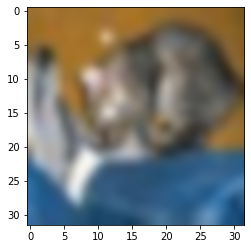

3
Label: 3 (Cat)
Predict: 3 (Cat)
[0, 0, 0, 210]
[0, 0, 0, 24]
[0, 0, 0, 9]
[0, 0, 0, 227]0%
[0, 0, 0, 24]
[0, 0, 0, 9]
[0, 0, 0, 210]0%
[0, 0, 0, 46]
[0, 0, 0, 1]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 108]0%
[0, 0, 0, 31]
[0, 0, 0, 2]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 194]0%
[0, 0, 0, 2]
[0, 0, 0, 4]
[0, 0, 0, 108]0%
[0, 0, 0, 31]
[0, 0, 0, 10]
[0, 0, 0, 194]0%
[0, 0, 0, 18]
[0, 0, 0, 1]


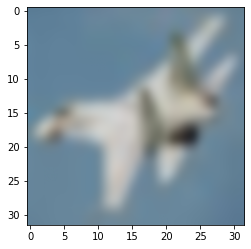

0
Label: 0 (Airplane)
Predict: 0 (Airplane)
[0, 0, 0, 100]
[0, 0, 0, 6]
[0, 0, 0, 10]
[0, 0, 0, 201]0%
[0, 0, 0, 52]
[0, 0, 0, 6]
[0, 0, 0, 25]00%
[0, 0, 0, 3]
[0, 0, 0, 8]
[0, 0, 0, 239]0%
[0, 0, 0, 6]
[0, 0, 0, 10]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 48]00%
[0, 0, 0, 52]
[0, 0, 0, 6]
[0, 0, 0, 104]0%
[0, 0, 0, 18]
[0, 0, 0, 8]
[0, 0, 0, 227]0%
[0, 0, 0, 24]
[0, 0, 0, 9]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 25]00%
[0, 0, 0, 18]
[0, 0, 0, 8]


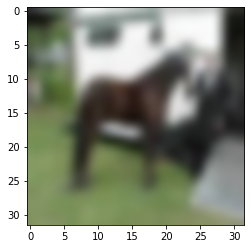

7
Label: 7 (Horse)
Predict: 7 (Horse)
[0, 0, 0, 201]
[0, 0, 0, 46]
[0, 0, 0, 3]
[0, 0, 0, 127]0%
[0, 0, 0, 18]
[0, 0, 0, 5]
[0, 0, 0, 239]0%
[0, 0, 0, 6]
[0, 0, 0, 10]
[0, 0, 0, 210]0%
[0, 0, 0, 18]
[0, 0, 0, 5]
[0, 0, 0, 210]0%
[0, 0, 0, 18]
[0, 0, 0, 3]
[0, 0, 0, 201]0%
[0, 0, 0, 18]
[0, 0, 0, 5]
[0, 0, 0, 29]00%
[0, 0, 0, 46]
[0, 0, 0, 1]
[0, 0, 0, 239]0%
[0, 0, 0, 6]
[0, 0, 0, 10]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]


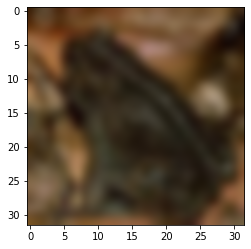

6
Label: 6 (Frog)
Predict: 6 (Frog)
[0, 0, 0, 201]
[0, 0, 0, 52]
[0, 0, 0, 6]
[0, 0, 0, 201]0%
[0, 0, 0, 18]
[0, 0, 0, 5]
[0, 0, 0, 201]0%
[0, 0, 0, 18]
[0, 0, 0, 6]
[0, 0, 0, 100]0%
[0, 0, 0, 6]
[0, 0, 0, 10]
[0, 0, 0, 210]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 106]0%
[0, 0, 0, 18]
[0, 0, 0, 5]
[0, 0, 0, 234]0%
[0, 0, 0, 31]
[0, 0, 0, 10]
[0, 0, 0, 230]0%
[0, 0, 0, 1]
[0, 0, 0, 10]
[0, 0, 0, 48]00%
[0, 0, 0, 52]
[0, 0, 0, 6]
[0, 0, 0, 210]0%
[0, 0, 0, 18]
[0, 0, 0, 5]


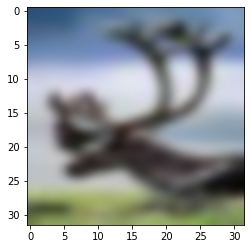

4
Label: 4 (Deer)
Predict: 4 (Deer)
[0, 0, 0, 201]
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 25]00%
[0, 0, 0, 52]
[0, 0, 0, 6]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 89]00%
[0, 0, 0, 46]
[0, 0, 0, 1]
[0, 0, 0, 100]0%
[0, 0, 0, 6]
[0, 0, 0, 10]
[0, 0, 0, 201]0%
[0, 0, 0, 2]
[0, 0, 0, 4]
[0, 0, 0, 210]0%
[0, 0, 0, 31]
[0, 0, 0, 9]
[0, 0, 0, 25]00%
[0, 0, 0, 18]
[0, 0, 0, 8]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 239]0%
[0, 0, 0, 6]
[0, 0, 0, 10]


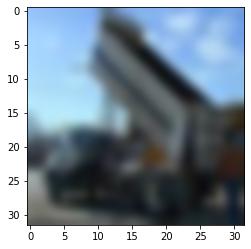

9
Label: 9 (Truck)
Predict: 9 (Truck)
[0, 0, 0, 227]
[0, 0, 0, 24]
[0, 0, 0, 9]
[0, 0, 0, 210]0%
[0, 0, 0, 2]
[0, 0, 0, 6]
[0, 0, 0, 201]0%
[0, 0, 0, 38]
[0, 0, 0, 4]
[0, 0, 0, 227]0%
[0, 0, 0, 24]
[0, 0, 0, 9]
[0, 0, 0, 227]0%
[0, 0, 0, 24]
[0, 0, 0, 9]
[0, 0, 0, 25]00%
[0, 0, 0, 18]
[0, 0, 0, 5]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 194]0%
[0, 0, 0, 52]
[0, 0, 0, 6]
[0, 0, 0, 201]0%
[0, 0, 0, 38]
[0, 0, 0, 7]
[0, 0, 0, 25]00%
[0, 0, 0, 18]
[0, 0, 0, 8]


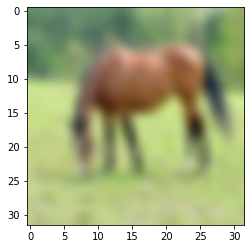

7
Label: 7 (Horse)
Predict: 7 (Horse)
[0, 0, 0, 201]
[0, 0, 0, 2]
[0, 0, 0, 6]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 210]0%
[0, 0, 0, 6]
[0, 0, 0, 10]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 201]0%
[0, 0, 0, 18]
[0, 0, 0, 3]
[0, 0, 0, 108]0%
[0, 0, 0, 31]
[0, 0, 0, 9]
[0, 0, 0, 201]0%
[0, 0, 0, 46]
[0, 0, 0, 3]
[0, 0, 0, 210]0%
[0, 0, 0, 49]
[0, 0, 0, 6]
[0, 0, 0, 25]00%
[0, 0, 0, 18]
[0, 0, 0, 8]
[0, 0, 0, 210]0%
[0, 0, 0, 18]
[0, 0, 0, 5]


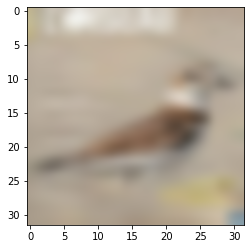

4
Label: 2 (Bird)
Predict: 4 (Deer)
[0, 0, 0, 201]
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 227]0%
[0, 0, 0, 24]
[0, 0, 0, 9]
[0, 0, 0, 227]0%
[0, 0, 0, 24]
[0, 0, 0, 9]
[0, 0, 0, 100]0%
[0, 0, 0, 46]
[0, 0, 0, 10]
[0, 0, 0, 1].00%
[0, 0, 0, 32]
[0, 0, 0, 3]
[0, 0, 0, 100]0%
[0, 0, 0, 6]
[0, 0, 0, 10]
[0, 0, 0, 227]0%
[0, 0, 0, 24]
[0, 0, 0, 4]
[0, 0, 0, 201]0%
[0, 0, 0, 52]
[0, 0, 0, 6]
[0, 0, 0, 227]0%
[0, 0, 0, 24]
[0, 0, 0, 9]
[0, 0, 0, 227]0%
[0, 0, 0, 24]
[0, 0, 0, 9]


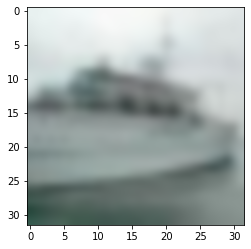

8
Label: 8 (Ship)
Predict: 8 (Ship)
[0, 0, 0, 210]
[0, 0, 0, 31]
[0, 0, 0, 9]
[0, 0, 0, 108]0%
[0, 0, 0, 31]
[0, 0, 0, 2]
[0, 0, 0, 25]00%
[0, 0, 0, 18]
[0, 0, 0, 8]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 210]0%
[0, 0, 0, 18]
[0, 0, 0, 6]
[0, 0, 0, 210]0%
[0, 0, 0, 18]
[0, 0, 0, 7]
[0, 0, 0, 89]00%
[0, 0, 0, 18]
[0, 0, 0, 8]
[0, 0, 0, 227]0%
[0, 0, 0, 24]
[0, 0, 0, 9]
[0, 0, 0, 100]0%
[0, 0, 0, 6]
[0, 0, 0, 10]
[0, 0, 0, 110]0%
[0, 0, 0, 46]
[0, 0, 0, 1]


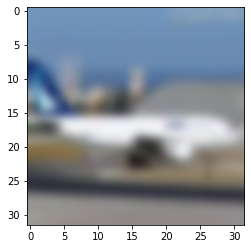

0
Label: 0 (Airplane)
Predict: 0 (Airplane)
[0, 0, 0, 201]
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 210]0%
[0, 0, 0, 24]
[0, 0, 0, 9]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 194]0%
[0, 0, 0, 18]
[0, 0, 0, 5]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 201]0%
[0, 0, 0, 7]
[0, 0, 0, 7]
[0, 0, 0, 210]0%
[0, 0, 0, 46]
[0, 0, 0, 5]
[0, 0, 0, 29]00%
[0, 0, 0, 46]
[0, 0, 0, 1]
[0, 0, 0, 25]00%
[0, 0, 0, 18]
[0, 0, 0, 8]
	100 images accuracy: 77.00%


In [24]:
acc = 0
for i in range(100):
    pred = inference(i)
    if pred == y_test[i]:
        acc += 1
    print("Progress: {:05.2f}%".format(100*i/100), end="\r", flush=True)
    # show sample image and predict result
    if i % 10 == 0:
        gen_image(X_test_origin[i]).show()
        print(pred)
        print("Label: %d (%s)" %(y_test[i], label_list[y_test[i]]))
        print("Predict: %d (%s)" %(pred, label_list[pred]))
print("\t100 images accuracy: {:.2f}%".format(acc/100 * 100))